# Prediction Heart Disease using machine learning
Using machine learning to be able to predict wether someone has heart disease of not

## Approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimenting

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target'>

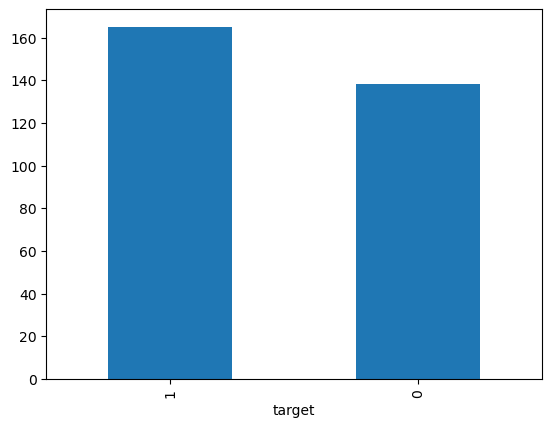

In [3]:
heart_disease["target"].value_counts().plot(kind="bar")

In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_disease["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
pd.crosstab(heart_disease["target"], heart_disease["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

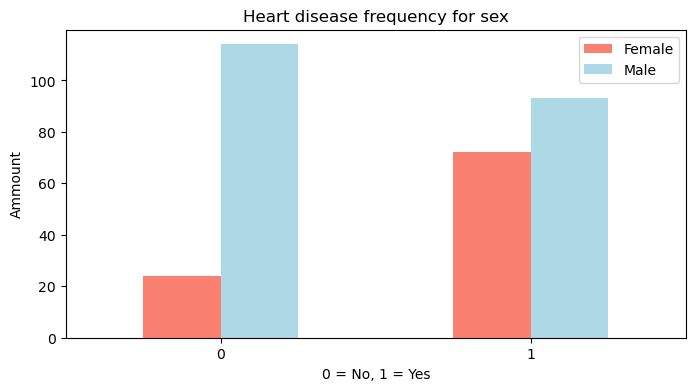

In [8]:
pd.crosstab(heart_disease["target"], heart_disease["sex"]).plot(kind="bar",
                                                                figsize=(8, 4),
                                                                color=["salmon", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Ammount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [9]:
list(heart_disease.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

<Axes: xlabel='target'>

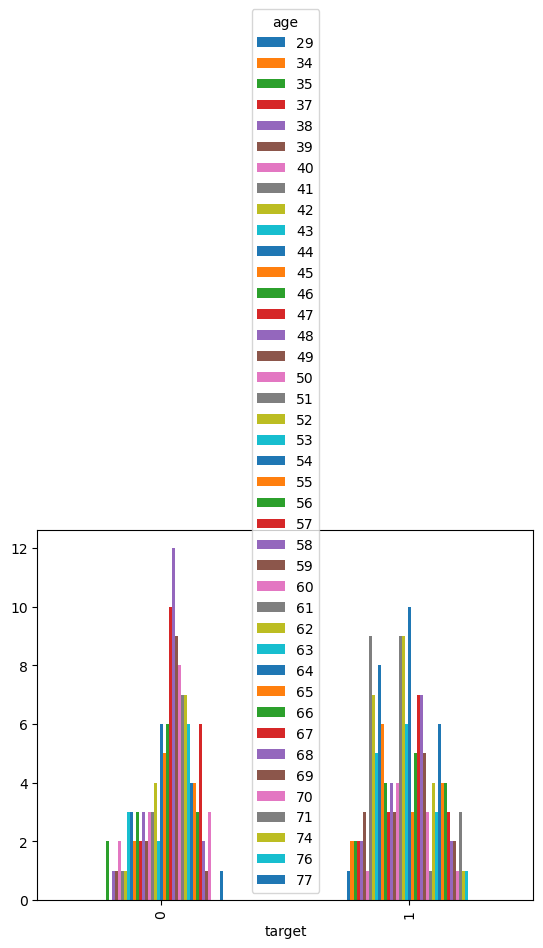

In [10]:
pd.crosstab(heart_disease["target"], heart_disease["age"]).plot(kind="bar")

Value 0: Typical angina - chest pain related to a decrease in blood supply to the heart. <br/>
Value 1: Atypical angina - chest pain not clearly related to the heart. <br/>
Value 2: Non-anginal pain - typically esophageal spasms (non-cardiac chest pain). <br/>
Value 3: Asymptomatic - no chest pain present.

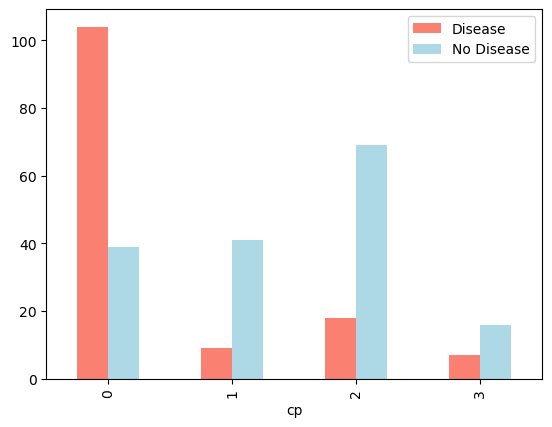

In [11]:
cp_series = heart_disease["cp"].replace({
    0: "Typical Angina",
    1: "Atypical Angina",
    2: "Non-anginal Pain",
    3: "Asymptomatic"
})

pd.crosstab(heart_disease["cp"], heart_disease["target"]).plot(kind="bar", color=["salmon", "lightblue"])
plt.legend(["Disease", "No Disease"]);

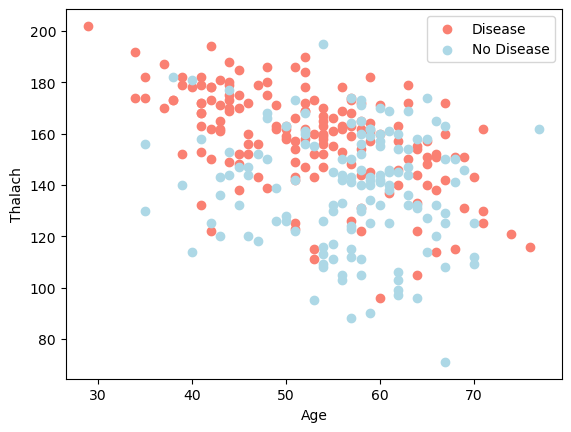

In [12]:
heart_disease["thalach"].value_counts()
# pd.crosstab(heart_disease["target"], heart_disease["thalach"]).plot(kind="scatter")
#heart disease
plt.scatter(heart_disease["age"][heart_disease["target"] == 1],
           heart_disease["thalach"][heart_disease["target"] == 1],
           c="salmon")

#No heart disease
plt.scatter(heart_disease["age"][heart_disease["target"] == 0],
           heart_disease["thalach"][heart_disease["target"] == 0],
           c="lightblue")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

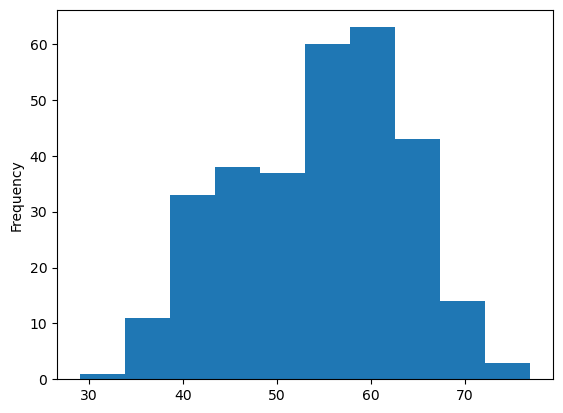

In [13]:
# Checking the distribution of the age column
heart_disease["age"].plot.hist()

# Building a corolation matrix

In [14]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


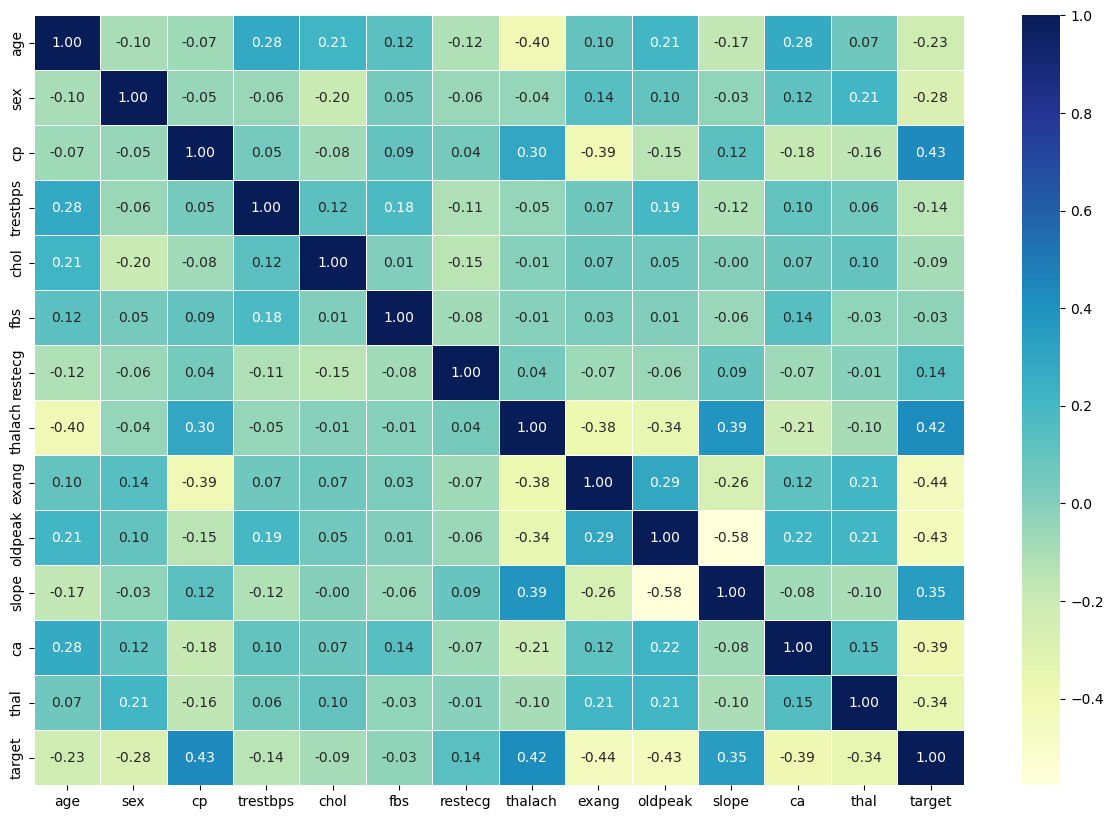

In [15]:
corr_matrix = heart_disease.corr()
fit, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


In [16]:
len(heart_disease)

303

In [17]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

len(X), len(y)

(303, 303)

In [18]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### We are goind to try
1. `Logistic Regression`
2. `KNN`
3. `RandomForestClassifier`

In [19]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [20]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [22]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,RandomForest
accuracy,0.885246,0.688525,0.836066


<Axes: >

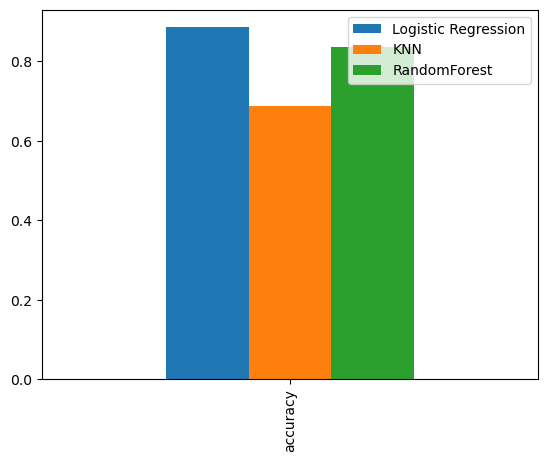

In [23]:
model_compare.plot.bar()

<Axes: >

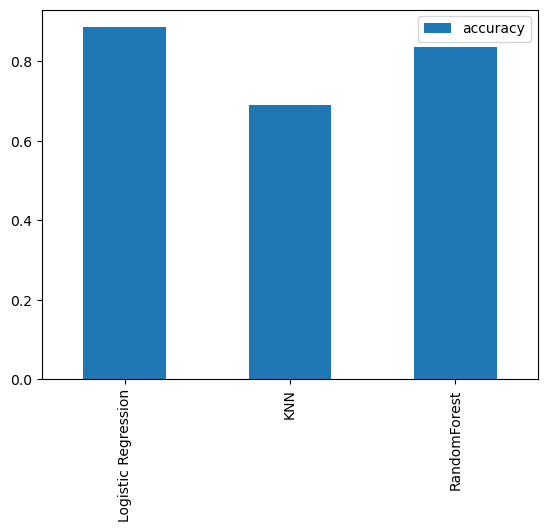

In [24]:
model_compare.T.plot.bar()

### To Do
* Hyper parameter tuning
* Feature imortance
* confusion matrix
* cross validation
* precision, f1 ...
* classification report
* ROC curve
* AUC

## Hyper parameter tuning

In [25]:
knn = KNeighborsClassifier()
knn.get_params()

train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Max score: 75.41%


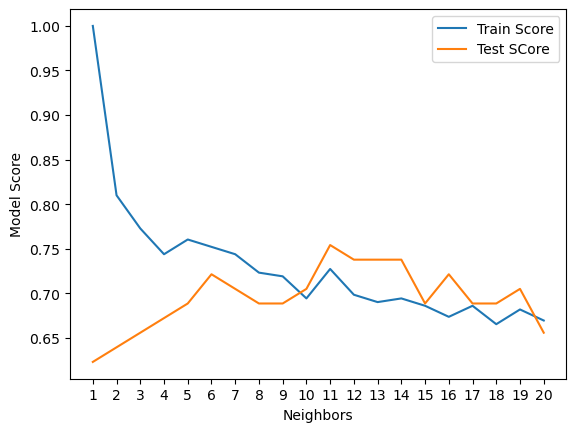

In [26]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test SCore")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Max score: {max(test_scores) * 100:.2f}%")

## Hyperparameter turning with `RandomizedSearchCV()`

In [30]:
np.arange(10, 1_000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [47]:
# Logistic regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# RandomForest
rf_grid = {
    "n_estimators": np.arange(10, 1_000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [42]:
np.random.seed(42)

# rs: Randome Search
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [44]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [48]:


rs_rf_grid = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid, 
                                cv=5, 
                                n_iter=20, 
                                verbose=True)

rs_rf_grid.fit(X_train, y_train)
rs_rf_grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 3}

### Logistic regression is still better than RF

In [51]:
rs_rf_grid.score(X_test, y_test)

0.8688524590163934

## Using `GridSearchCV()`

In [56]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [57]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [61]:
y_preds = gs_log_reg.predict(X_test)
f1_score(y_test, y_preds)

0.8923076923076922

# Ploting `ROC` Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


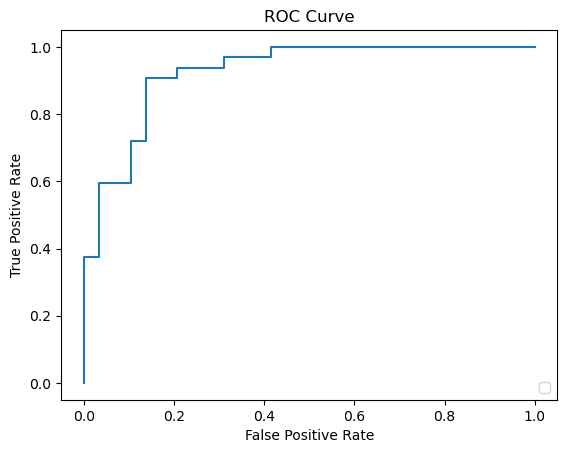

In [64]:
y_proba = gs_log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Create RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot ROC curve
roc_display.plot()
plt.title('ROC Curve')
plt.show()

In [65]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

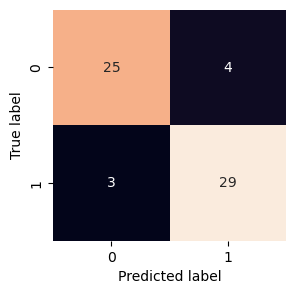

In [70]:
# sns.set(font_size=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(data=confusion_matrix(y_test, y_preds), 
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating evaluation metrics using cross validation (`cross_val_score()`)

In [76]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [77]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [89]:
def cross_val_avg(scoring):
    cv = cross_val_score(clf, X, y, cv=5, verbose=True, scoring=scoring)
    return np.mean(cv)

In [91]:
cross_val_avg("accuracy")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8479781420765027

In [92]:
cross_val_avg("precision")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8215873015873015

In [94]:
cross_val_avg("recall")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.9272727272727274

In [95]:
cross_val_avg("f1")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8705403543192143

In [96]:
score_types = ["accuracy", "precision", "recall", "f1"]
scores = {}
for s in score_types:
    scores[s] = cross_val_avg(s)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'accuracy': 0.8479781420765027,
 'precision': 0.8215873015873015,
 'recall': 0.9272727272727274,
 'f1': 0.8705403543192143}

In [106]:
cv_metrics = pd.DataFrame(scores, index=[0])
cv_metrics.T

,0
accuracy,0.847978
precision,0.821587
recall,0.927273
f1,0.870540


<Axes: title={'center': 'Cross Val metrics'}>

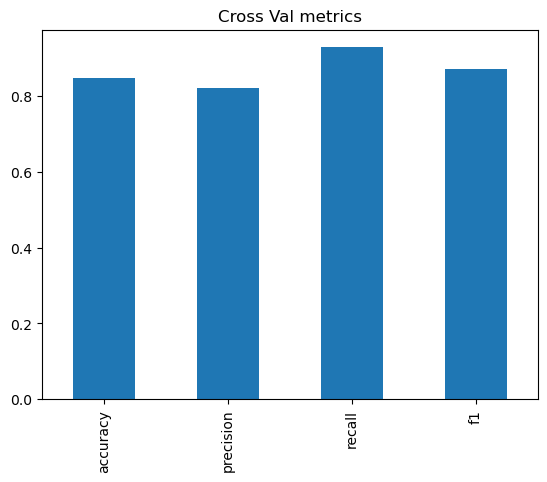

In [108]:
cv_metrics.T.plot.bar(title="Cross Val metrics", legend=False)

<Axes: title={'center': 'Cross Val metrics'}>

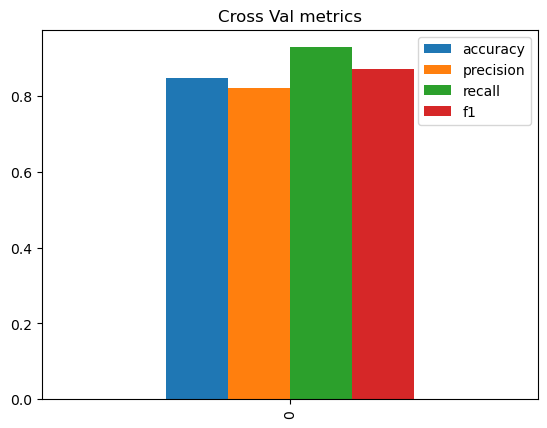

In [110]:
cv_metrics.plot.bar(title="Cross Val metrics")

# Feature Importance

In [112]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [114]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [115]:
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [125]:
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))

In [126]:
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [129]:
feature_df = pd.DataFrame(feature_dict, index=[0])

In [131]:
feature_df.T

,0
age,0.003699
sex,-0.904241
cp,0.674728
trestbps,-0.011613
chol,-0.001704
fbs,0.047877
restecg,0.334902
thalach,0.024729
exang,-0.631204
oldpeak,-0.575909


<Axes: >

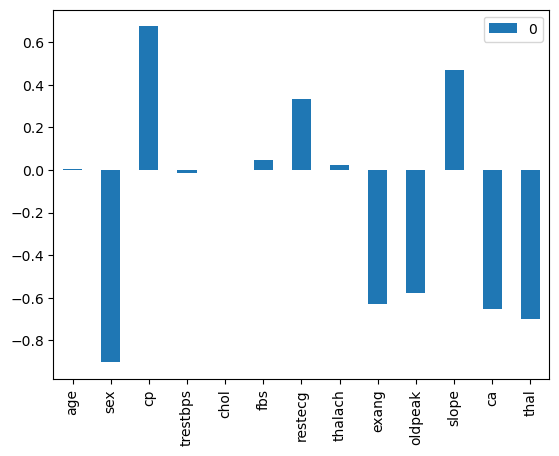

In [130]:
feature_df.T.plot.bar()